<a href="https://colab.research.google.com/github/cxbxmxcx/GenReality/blob/master/GEN_3_function_approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split

import numpy  as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [ ]:
def function(X):
  return X * X + 5.

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

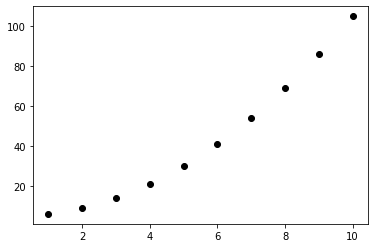

In [ ]:
X = np.array([[1.],[2.],[3.],[4.],[5.],[6.],[7.],[8.],[9.],[10.]])
y = function(X)
inputs = X.shape[1]
y = y.reshape(-1, 1)
plt.plot(X, y, 'o', color='black')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
num_train = X_train.shape[0]
X_train[:2], y_train[:2]
num_train

8

In [ ]:
torch.set_default_dtype(torch.float64)
net = nn.Sequential(
    nn.Linear(inputs, 50, bias = True), nn.ReLU(),
    nn.Linear(50, 50, bias = True), nn.ReLU(),
    nn.Linear(50, 50, bias = True), nn.Sigmoid(),
    nn.Linear(50, 1)
)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = .001)

In [ ]:
num_epochs = 8000
y_train_t = torch.from_numpy(y_train).clone().reshape(-1, 1)
x_train_t = torch.from_numpy(X_train).clone()
y_test_t = torch.from_numpy(y_test).clone().reshape(-1, 1)
x_test_t = torch.from_numpy(X_test).clone()
history = []

tensor([[ 5.],
        [10.],
        [ 2.],
        [ 7.],
        [ 8.],
        [ 4.],
        [ 1.],
        [ 6.]])

In [ ]:
for i in range(num_epochs):
    y_pred = net(x_train_t)
    loss = loss_fn(y_train_t,y_pred)
    history.append(loss.data)    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()  
    test_loss = loss_fn(y_test_t,net(x_test_t))  
    if i > 0 and i % 100 == 0:
        print(f'Epoch {i}, loss = {loss:.3f}, test loss {test_loss:.3f}')

Epoch 100, loss = 2279.083, test loss 3247.548
Epoch 200, loss = 2027.327, test loss 2937.767
Epoch 300, loss = 1805.935, test loss 2664.226
Epoch 400, loss = 1610.167, test loss 2425.456
Epoch 500, loss = 1439.706, test loss 2214.201
Epoch 600, loss = 1292.612, test loss 2024.813
Epoch 700, loss = 1163.477, test loss 1832.955
Epoch 800, loss = 1048.232, test loss 1666.764
Epoch 900, loss = 946.765, test loss 1515.756
Epoch 1000, loss = 856.334, test loss 1377.011
Epoch 1100, loss = 775.105, test loss 1249.045
Epoch 1200, loss = 702.596, test loss 1131.456
Epoch 1300, loss = 638.291, test loss 1023.794
Epoch 1400, loss = 581.023, test loss 925.118
Epoch 1500, loss = 528.696, test loss 833.552
Epoch 1600, loss = 481.186, test loss 748.992
Epoch 1700, loss = 438.296, test loss 671.274
Epoch 1800, loss = 399.830, test loss 600.118
Epoch 1900, loss = 365.543, test loss 535.242


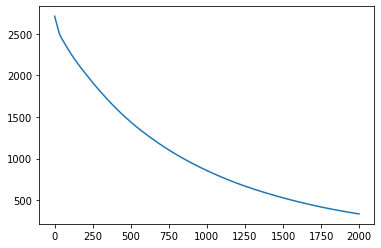

In [ ]:
plt.plot(history)

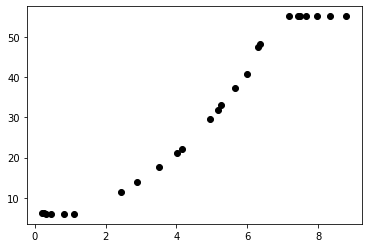

In [ ]:
X_a = torch.rand(25,1).clone() * 9
y_a = net(X_a)
y_a = y_a.detach().numpy()
plt.plot(X_a, y_a, 'o', color='black')